In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import os
import distance
%matplotlib inline
sns.set(rc={'axes.facecolor':'#FFFFFF'})
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)

In [8]:
chunks=['S'+str(i) for i in range(1,13)]

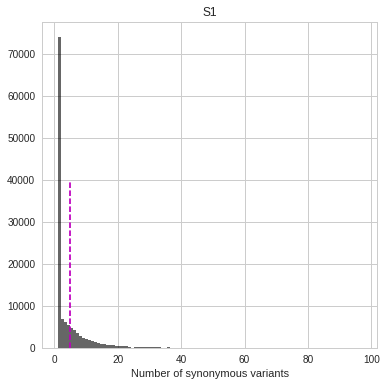

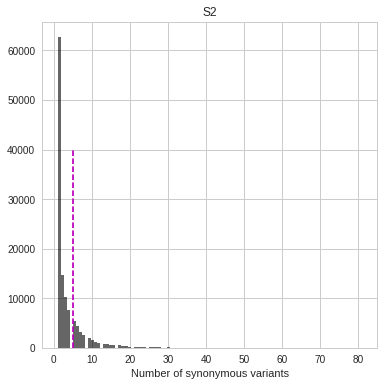

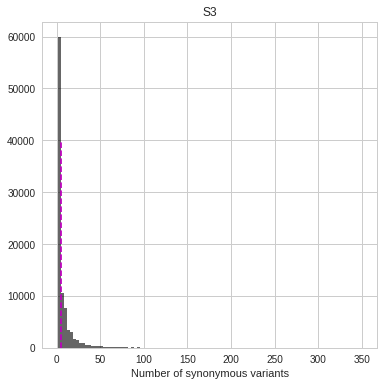

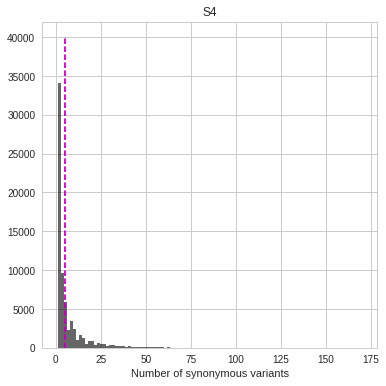

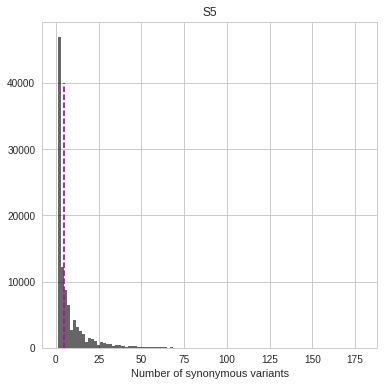

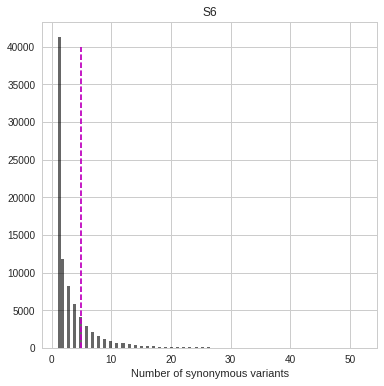

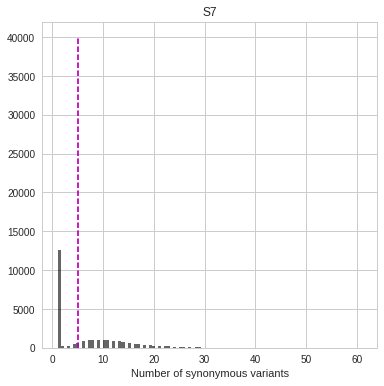

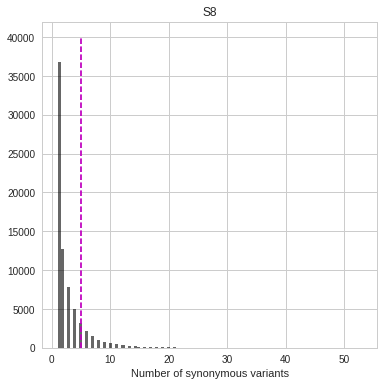

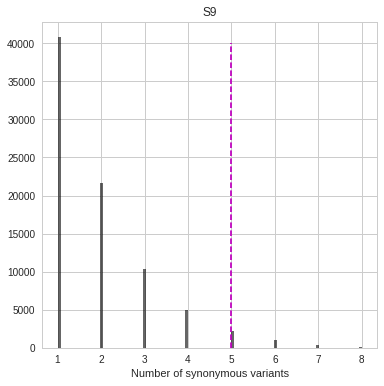

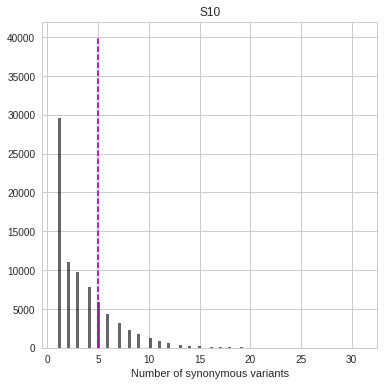

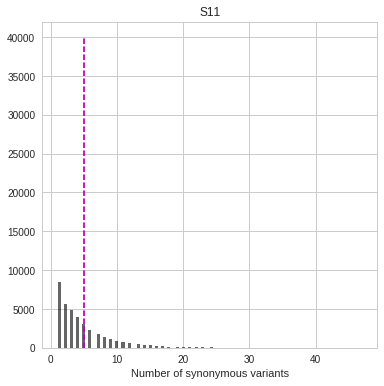

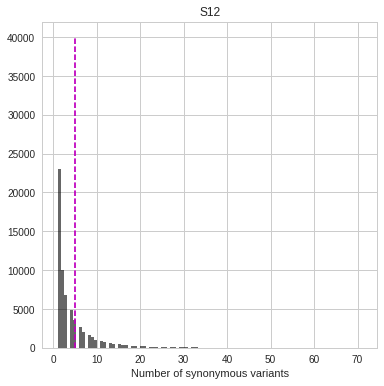

In [53]:
data = {}
clean_data = {}
mut_data = {}
for chunk in chunks:
    data[chunk] = pd.DataFrame.from_csv('../../../../Data/'+chunk+'_scaled_info_v2.csv', sep='\t')
    plt.figure(figsize=[6,6])
    plt.hist(data[chunk]['size'],bins=100,color='k',alpha=0.6)
    plt.plot([5]*2,[0,40000],'--m')
    plt.xlabel('Number of synonymous variants')
    plt.title(chunk);

In [58]:
data = {}
clean_data = {}
mut_data = {}

data['S9'] = pd.DataFrame.from_csv('../../S9_new_sum_10_size_4_with_nons_aa_avg_info_k_11.4_s12_0.27_scaled.csv', sep='\t')

median = np.median(data['S9'].index.str.len())

clean_data['S9'] = data['S9'][(data['S9']['nonsense'] == 0) & (data['S9']['middle'] == 1) & \
                                    (data['S9']['nat_lib'] == 1) & (data['S9']['stop'] == 0) & \
                                    (data['S9'].index.str.len() == median) & (data['S9']['s_std'] <= 0.05)]

mut_data['S9'] = pd.DataFrame(clean_data['S9'].mut_list)
mut_data['S9']['fitness'] = clean_data['S9'].s

mut_data['S9'].index = mut_data['S9'].mut_list
mut_data['S9'].drop(['mut_list'], axis=1, inplace=True)
mut_data['S9']['aa_seq'] = clean_data['S9'].index

mut_data['S9'].to_csv('/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/NN/data/S9.txt', sep='\t')

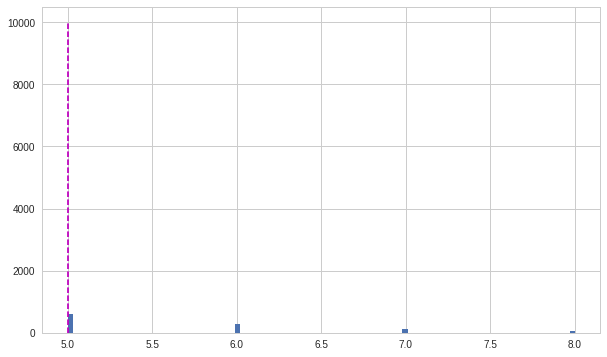

In [49]:
plt.figure(figsize=[10,6])
plt.hist(clean_data['S9']['size'],bins=100)
plt.plot([5]*2,[0,10000],'--m')

In [55]:
clean_data['S9']

,t0_fr,t1_fr,t2_fr,t0_fr_var,t1_fr_var,t2_fr_var,size,y0,s,y0_std,s_std,boundary,nonsense,len,nogap,stop,shift,middle,mut_list,nat,lib,nat_lib,dist_Agos,dist_Anid,dist_Calb,dist_Cgla,dist_Cgui,dist_Clus,dist_Cpar,dist_Ctro,dist_Dhan,dist_Klac,dist_Kwal,dist_Lelo,dist_Ncra,dist_Sbay,dist_Scas,dist_Scer,dist_Sjap,dist_Sklu,dist_Soct,dist_Spom,dist_Ylip,dist_node_22,dist_node_23,dist_node_24,dist_node_25,dist_node_26,dist_node_27,dist_node_28,dist_node_29,dist_node_30,dist_node_31,dist_node_32,dist_node_33,dist_node_34,dist_node_35,dist_node_36,dist_node_37,dist_node_38,dist_node_39,dist_node_40,dist_node_41,dist_min_sp,dist_min_all,mut_list_Scer,s_original,s_std_original
aa_seq,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PAKEADAVAEQASGGQAIDI,4.416420,5.443127,3.949268,0.165520,2.581970,3.951814,2,4.396986,0.856953,6.571761e-02,0.024018,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16A:18D:19I,1,1,1,11,9,9,11,13,9,8,7,11,9,7,9,8,7,7,8,12,6,11,11,11,9,9,9,8,8,8,8,6,5,6,6,7,8,8,9,8,7,8,11,11,6,5,37A:41D:48S:49G:50G:52A:54D:55I,0.259455,7.620435e-03
PAKEADAVAEQASGGQAINI,3.383840,2.913001,0.000000,0.121343,1.135448,0.000275,2,3.412944,0.000000,1.649547e-01,0.000000,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16A:19I,1,1,1,10,9,8,11,13,9,7,6,11,10,8,8,8,6,8,7,12,7,11,11,11,9,9,9,8,7,7,7,7,6,5,7,8,7,7,9,7,6,7,11,11,6,5,37A:41D:48S:49G:50G:52A:55I,-0.308681,1.227161e-01
PAKEADAVAEQASGGQAINV,4.330587,5.415837,4.869458,0.414826,0.675098,1.948525,2,4.208888,0.927754,1.302686e-01,0.024505,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16A,1,1,1,9,10,7,10,12,8,6,5,10,11,9,7,7,5,9,6,11,8,10,10,10,8,8,8,7,6,6,6,8,7,4,8,9,6,6,8,6,5,6,10,10,5,4,37A:41D:48S:49G:50G:52A,0.281919,7.774931e-03
PAKEADAVAEQASGGQAISV,3.042189,3.875223,7.060025,0.151747,0.641223,2.213237,1,2.951827,1.129175,1.447581e-01,0.029602,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16A:18S,1,1,1,10,10,8,10,11,8,7,6,10,11,9,8,6,6,9,7,11,8,10,10,9,7,7,7,6,7,7,7,8,7,5,8,9,7,7,8,7,6,7,10,10,6,5,37A:41D:48S:49G:50G:52A:54S,0.345827,9.392377e-03
PAKEADAVAEQASGGQAVNI,1.558099,0.000000,0.000000,0.064214,0.000295,0.000138,1,NaN,0.000000,NaN,0.000000,1,0,20,0,0,0,1,1A:5D:12S:13G:14G:16A:17V:19I,1,1,1,11,10,9,12,14,10,8,7,12,11,9,9,9,7,9,8,11,8,12,12,12,10,10,10,9,8,8,8,8,7,6,8,9,8,8,10,8,7,8,12,12,7,6,37A:41D:48S:49G:50G:52A:53V:55I,-2.916389,NaN
PAKEADAVAEQASGGQAVSI,1.535692,0.000000,0.000000,0.066892,0.000295,0.000138,1,NaN,0.000000,NaN,0.000000,1,0,20,0,0,0,1,1A:5D:12S:13G:14G:16A:17V:18S:19I,1,1,1,12,10,10,12,13,10,9,8,12,11,9,10,8,8,9,9,11,8,12,12,11,9,9,9,8,9,9,9,8,7,7,8,9,9,9,10,9,8,9,12,12,8,7,37A:41D:48S:49G:50G:52A:53V:54S:55I,-2.901904,NaN
PAKEADAVAEQASGGQIINI,4.749555,1.156476,0.000000,0.349830,0.650218,0.000413,3,4.749555,0.000000,6.451083e-07,0.000000,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16I:19I,1,1,1,10,9,8,11,13,9,7,6,11,9,8,8,8,6,8,7,12,7,11,11,11,9,9,9,8,7,7,7,7,6,5,7,8,7,7,9,7,6,7,11,11,6,5,37A:41D:48S:49G:50G:52I:55I,-1.412674,7.725298e-07
PAKEADAVAEQASGGQIVNI,2.932284,2.876389,0.000000,0.141482,1.162584,0.000138,1,2.988205,0.000000,2.713194e-01,0.000000,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16I:17V:19I,1,1,1,11,10,9,12,14,10,8,7,12,10,9,9,9,7,9,8,11,8,12,12,12,10,10,10,9,8,8,8,8,7,6,8,9,8,8,10,8,7,8,12,12,7,6,37A:41D:48S:49G:50G:52I:53V:55I,-0.311359,1.714740e-01
PAKEADAVAEQASGGQIVNV,8.718195,11.445608,0.000000,1.222872,1.513770,0.000275,2,10.615625,0.000000,3.353713e+00,0.000000,0,0,20,0,0,0,1,1A:5D:12S:13G:14G:16I:17V,1,1,1,10,11,8,11,13,9,7,6,11,11,10,8,8,6,10,7,10,9,11,11,11,9,9,9,8,7,7,7,9,8,5,9,10,7,7,9,7,6,7,11,11,6,5,37A:41D:48S:49G:50G:52I:53V,-0.276568,2.341220e-01
